#📌 Extracción

Extraccion de datos desde API

In [1]:

import requests
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response=requests.get(url)
datos=response.json()
df_base=pd.DataFrame(datos)
df_base.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Conversion de estructuras de datos anidadas Json a Dataframe vía Normalizacion

In [2]:
from pandas import json_normalize
df=json_normalize(datos)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Estandarización y transformación de datos: Cambios para facilitar el trabajo con los datos: Cambio de nombres en columnas, conversion a minusculas y cambio de "." por "_"

In [3]:
df.rename(columns={'customerID':'id_cliente','customer.gender':'genero','customer.SeniorCitizen':'mayor_de_65',
                   'customer.Partner':'pareja','customer.Dependents':'dependientes',
                   'customer.tenure':'meses_de_contrato','phone.PhoneService':'suscripcion_telefonia',
                   'phone.MultipleLines':'suscripcion_a_mas_de_una_linea_telefonica','internet.InternetService':'suscripcion_internet',
                   'internet.OnlineSecurity':'suscripcion_seguridad_en_linea','internet.OnlineBackup':'suscripcion_backup_en_linea',
                   'internet.DeviceProtection':'suscripcion_proteccion_de_dispositivos','internet.TechSupport':'suscripcion_soporte_tecnico',
                   'internet.StreamingTV':'suscripicion_streaming_tv','internet.StreamingMovies':'suscripcion_streaming_peliculas',
                   'account.Contract':'tipo_contrato','account.PaperlessBilling':'factura_online','account.PaymentMethod':'forma_de_pago',
                   'account.Charges.Monthly':'total_mensual','account.Charges.Total':'total_gastado','Churn':'se_fue'},inplace=True)
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace('.','_')
df.head(5)

,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,...,suscripcion_backup_en_linea,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Explorar Dataset y verificar tipos de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_cliente                                 7267 non-null   object 
 1   se_fue                                     7267 non-null   object 
 2   genero                                     7267 non-null   object 
 3   mayor_de_65                                7267 non-null   int64  
 4   pareja                                     7267 non-null   object 
 5   dependientes                               7267 non-null   object 
 6   meses_de_contrato                          7267 non-null   int64  
 7   suscripcion_telefonia                      7267 non-null   object 
 8   suscripcion_a_mas_de_una_linea_telefonica  7267 non-null   object 
 9   suscripcion_internet                       7267 non-null   object 
 10  suscripcion_seguridad_en

In [5]:
df.dtypes

,0
id_cliente,object
se_fue,object
genero,object
mayor_de_65,int64
pareja,object
dependientes,object
meses_de_contrato,int64
suscripcion_telefonia,object
suscripcion_a_mas_de_una_linea_telefonica,object
suscripcion_internet,object


Consultar el Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Comprobación de incoherencias en los datos: Valores Nulos

In [6]:
print(f"Valores Nulos")
df.isnull().sum()

Valores Nulos


,0
id_cliente,0
se_fue,0
genero,0
mayor_de_65,0
pareja,0
dependientes,0
meses_de_contrato,0
suscripcion_telefonia,0
suscripcion_a_mas_de_una_linea_telefonica,0
suscripcion_internet,0


Comprobación de incoherencias en los datos: Valores Duplicados

In [7]:
print(f"Duplicados:{df.duplicated().sum()}")

Duplicados:0


Comprobación de incoherencias en los datos: Valores Unicos y verificacion por columna

In [8]:
df.nunique()

,0
id_cliente,7267
se_fue,3
genero,2
mayor_de_65,2
pareja,2
dependientes,2
meses_de_contrato,73
suscripcion_telefonia,2
suscripcion_a_mas_de_una_linea_telefonica,3
suscripcion_internet,3


In [9]:

for col in df.columns:
   print(f"Valores unicos para la columna {col}:")
   print(df[col].unique())
   print("-"*80)

Valores unicos para la columna id_cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores unicos para la columna se_fue:
['No' 'Yes' '']
--------------------------------------------------------------------------------
Valores unicos para la columna genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores unicos para la columna mayor_de_65:
[0 1]
--------------------------------------------------------------------------------
Valores unicos para la columna pareja:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna dependientes:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna meses_de_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 

Comprobación de incoherencias en los datos: Valores en blanco o String vacios

In [10]:
valores_en_blanco_o_vacio = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
se_fue           224
total_gastado     11
dtype: int64


Manejo de incosistencias: Eliminar campos vacios (columna se_fue)

In [11]:
df = df[df['se_fue'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'se_fue':", len(df))

Número de filas después de eliminar las vacías en 'se_fue': 7043


Manejo de incosistencias: Eliminar campos vacios (columna total_gastado)

In [12]:
df = df[df['total_gastado'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'total_gastado':", len(df))

Número de filas después de eliminar las vacías en 'total_gastado': 7032


Estandarización y transformación de datos: Conversion columna total_gastado a valor númerico (float)

In [13]:
df["total_gastado"]=pd.to_numeric(df["total_gastado"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_cliente                                 7032 non-null   object 
 1   se_fue                                     7032 non-null   object 
 2   genero                                     7032 non-null   object 
 3   mayor_de_65                                7032 non-null   int64  
 4   pareja                                     7032 non-null   object 
 5   dependientes                               7032 non-null   object 
 6   meses_de_contrato                          7032 non-null   int64  
 7   suscripcion_telefonia                      7032 non-null   object 
 8   suscripcion_a_mas_de_una_linea_telefonica  7032 non-null   object 
 9   suscripcion_internet                       7032 non-null   object 
 10  suscripcion_seguridad_en_line

Estandarización y transformación de datos: Conversion columna mayor_de_65 a string

In [14]:
df["mayor_de_65"]=df["mayor_de_65"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_cliente                                 7032 non-null   object 
 1   se_fue                                     7032 non-null   object 
 2   genero                                     7032 non-null   object 
 3   mayor_de_65                                7032 non-null   object 
 4   pareja                                     7032 non-null   object 
 5   dependientes                               7032 non-null   object 
 6   meses_de_contrato                          7032 non-null   int64  
 7   suscripcion_telefonia                      7032 non-null   object 
 8   suscripcion_a_mas_de_una_linea_telefonica  7032 non-null   object 
 9   suscripcion_internet                       7032 non-null   object 
 10  suscripcion_seguridad_en_line

Estandarización y transformación de datos: Conversion columna con campos binarios desde yes/no a 1/0 respectivamente

In [15]:
col_binarias=['se_fue','pareja','dependientes','suscripcion_telefonia','suscripcion_internet','suscripcion_proteccion_de_dispositivos','suscripcion_seguridad_en_linea','suscripcion_backup_en_linea','suscripcion_soporte_tecnico','suscripicion_streaming_tv','suscripcion_streaming_peliculas','factura_online']
for col in col_binarias:
    df.loc[:,col]=df.loc[:,col].apply(lambda x: 1 if x=='Yes' else 0)
df.sample(5)


,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,...,suscripcion_backup_en_linea,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado
2676,3719-TDVQB,0,Female,1,1,0,54,1,No,0,...,0,0,0,0,0,Two year,1,Mailed check,18.95,1031.10
6766,9334-GWGOW,0,Male,1,1,0,7,1,Yes,0,...,0,0,0,0,0,Month-to-month,1,Electronic check,74.85,485.25
3845,5266-PFRQK,0,Male,0,1,1,52,1,No,0,...,0,0,0,0,0,One year,1,Credit card (automatic),20.85,1071.60
1800,2565-JSLRY,1,Male,0,0,0,1,1,Yes,0,...,0,0,0,0,0,Month-to-month,1,Mailed check,24.05,24.05
1675,2373-NTKOD,0,Male,0,0,0,8,1,No,0,...,0,0,0,1,1,Month-to-month,1,Electronic check,66.25,546.45


Crear Columna cuentas_diarias

In [16]:
df["cuentas_diarias"]=df["total_mensual"]/30
#hacer un sample de las columnas total_mensal y cuentas_diarias
df.sample(5)[['total_mensual','cuentas_diarias']]

,total_mensual,cuentas_diarias
1383,107.75,3.591667
5283,70.30,2.343333
5929,76.75,2.558333
2750,20.55,0.685000
5889,81.35,2.711667


#📊 Carga y análisis

Analisis descriptivo de datos numéricos

In [17]:
df.describe()


,meses_de_contrato,total_mensual,total_gastado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


Analisis descriptivo de datos categóricos

In [18]:
df.describe(include='object')

,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,suscripcion_seguridad_en_linea,suscripcion_backup_en_linea,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,2,3,1,2,2,2,2,2,2,3,2,4
top,9995-HOTOH,0,Male,0,0,0,1,No,0,0,0,0,0,0,0,Month-to-month,1,Electronic check
freq,1,5163,3549,5890,3639,4933,6352,3385,7032,5017,4607,4614,4992,4329,4301,3875,4168,2365


Distribucion de columnas con campos categóricos

In [19]:
for col in df.columns:
    print(f"Distribución de {col}:")
    if df[col].value_counts().shape[0] <= 5:# se usa 5 porque el máximo número de clases en las columnas categoricas es 4
      print(df[col].value_counts())
      print("-"*80)

Distribución de id_cliente:
Distribución de se_fue:
se_fue
0    5163
1    1869
Name: count, dtype: int64
--------------------------------------------------------------------------------
Distribución de genero:
genero
Male      3549
Female    3483
Name: count, dtype: int64
--------------------------------------------------------------------------------
Distribución de mayor_de_65:
mayor_de_65
0    5890
1    1142
Name: count, dtype: int64
--------------------------------------------------------------------------------
Distribución de pareja:
pareja
0    3639
1    3393
Name: count, dtype: int64
--------------------------------------------------------------------------------
Distribución de dependientes:
dependientes
0    4933
1    2099
Name: count, dtype: int64
--------------------------------------------------------------------------------
Distribución de meses_de_contrato:
Distribución de suscripcion_telefonia:
suscripcion_telefonia
1    6352
0     680
Name: count, dtype: int64
--------

Archivo modificado final

In [20]:
df.to_csv("datos_tratados_final.csv", index=False)

#Visualizaciones

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U plotly kaleido
import kaleido
import plotly.express as px

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df.columns

Index(['id_cliente', 'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'meses_de_contrato', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago', 'total_mensual',
       'total_gastado', 'cuentas_diarias'],
      dtype='object')

## Distribucion de Bajas

In [24]:
print(df['se_fue'].value_counts())
conteo = df['se_fue'].value_counts().reset_index()
conteo.columns = ['se_fue', 'cantidad']
conteo
fig = px.pie(conteo, names='se_fue', values='cantidad', title='Distribución de bajas (Yes/No)')

fig.write_html('/content/abandono.html')
fig.show()

se_fue
0    5163
1    1869
Name: count, dtype: int64


## Distibución de CHURN por género

In [25]:
import plotly.express as px
df_temp=df.assign(
        Abandono=df['se_fue'],
        Genero=df['genero']
    )

df_group = (
    df_temp.groupby(['Genero', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)
total_por_genero = df_group.groupby('Genero')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total_por_genero * 100).round(1)

df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='Genero',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'Genero': 'Género'}
)

fig.update_layout(title="Distribución de Género vs Abandono (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/genero.html')
fig.show()


   Genero  Abandono  conteo  porcentaje         texto
0  Female         0    2544        73.0  2544 (73.0%)
1  Female         1     939        27.0   939 (27.0%)
2    Male         0    2619        73.8  2619 (73.8%)
3    Male         1     930        26.2   930 (26.2%)


## Distibución de CHURN por estar en pareja

In [ ]:
df_temp=df.assign(
        Abandono=df['se_fue'],
        Pareja=df['pareja']
    )
df_group = (
    df_temp.groupby(['Pareja', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)
df_group

print(df.groupby(['pareja','se_fue']).size().reset_index(name='conteo'))

total = df_group.groupby('Pareja')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='Pareja',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'pareja': 'Pareja'}
)

fig.update_layout(title="Abandono segun si esta en Pareja (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/pareja.html')
fig.show()

   pareja  se_fue  conteo
0       0       0    2439
1       0       1    1200
2       1       0    2724
3       1       1     669
   Pareja  Abandono  conteo  porcentaje         texto
0       0         0    2439        67.0  2439 (67.0%)
1       0         1    1200        33.0  1200 (33.0%)
2       1         0    2724        80.3  2724 (80.3%)
3       1         1     669        19.7   669 (19.7%)


## Distibución de CHURN por ser mayor de 65 años

In [ ]:


df_temp=df.assign(
        Abandono=df['se_fue'],
        Mayor=df['mayor_de_65'].map({'1': 'Mayor de 65', '0': 'Menor de 65'})
    )

df_group = (
    df_temp.groupby(['Mayor', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)



print(df.groupby(['mayor_de_65','se_fue']).size().reset_index(name='conteo'))

total = df_group.groupby('Mayor')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)


df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='Mayor',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'pareja': 'Pareja'}
)

fig.update_layout(title="Abandono según si es mayor de 65 años", yaxis_title="Cantidad")
fig.write_html('/content/mayor_65.html')
fig.show()


  mayor_de_65  se_fue  conteo
0           0       0    4497
1           0       1    1393
2           1       0     666
3           1       1     476
         Mayor  Abandono  conteo  porcentaje         texto
0  Mayor de 65         0     666        58.3   666 (58.3%)
1  Mayor de 65         1     476        41.7   476 (41.7%)
2  Menor de 65         0    4497        76.3  4497 (76.3%)
3  Menor de 65         1    1393        23.7  1393 (23.7%)


## Distibución de CHURN por tener o no dependientes

In [ ]:

df_temp=df.assign(
        Abandono=df['se_fue'],
        Dependientes=df['dependientes']
    )
df_group = (
    df_temp.groupby(['Dependientes', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)

print(df.groupby(['dependientes','se_fue']).size().reset_index(name='conteo'))


total = df_group.groupby('Dependientes')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)


df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='Dependientes',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'Dependientes': 'Dependientes'}
)

fig.update_layout(title="Abandono segun si tiene Dependientes (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/dependientes.html')
fig.show()

   dependientes  se_fue  conteo
0             0       0    3390
1             0       1    1543
2             1       0    1773
3             1       1     326
   Dependientes  Abandono  conteo  porcentaje         texto
0             0         0    3390        68.7  3390 (68.7%)
1             0         1    1543        31.3  1543 (31.3%)
2             1         0    1773        84.5  1773 (84.5%)
3             1         1     326        15.5   326 (15.5%)


## Distibución de CHURN segun los meses de contrato

In [ ]:

df_temp=df.assign(
        Abandono=df['se_fue']
    )


df_group = (
    df_temp.groupby(['meses_de_contrato', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


print(df.groupby(['meses_de_contrato','se_fue']).size().reset_index(name='conteo'))


total = df_group.groupby('meses_de_contrato')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='meses_de_contrato',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'meses_de_contrato': 'Meses de Contrato'}
)

fig.update_layout(title="Abandono segun los meses del contrato (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/meses_contrato.html')
fig.show()


     meses_de_contrato  se_fue  conteo
0                    1       0     233
1                    1       1     380
2                    2       0     115
3                    2       1     123
4                    3       0     106
..                 ...     ...     ...
139                 70       1      11
140                 71       0     164
141                 71       1       6
142                 72       0     356
143                 72       1       6

[144 rows x 3 columns]
     meses_de_contrato  Abandono  conteo  porcentaje        texto
0                    1         0     233        38.0  233 (38.0%)
1                    1         1     380        62.0  380 (62.0%)
2                    2         0     115        48.3  115 (48.3%)
3                    2         1     123        51.7  123 (51.7%)
4                    3         0     106        53.0  106 (53.0%)
..                 ...       ...     ...         ...          ...
139                 70         1      11      

In [ ]:
df_agrupado=df.groupby(['meses_de_contrato','se_fue']).size().unstack().reset_index()
df_agrupado.columns=['meses_de_contrato','No','Sí']


fig=px.line(df_agrupado,x='meses_de_contrato',y=['Sí'],markers=True)

fig.update_layout(title="Cantidad de abandono segun los meses del contrato (Cantidad)", yaxis_title="Cantidad")
fig.write_html('/content/meses_contrato_linea.html')
fig.show()

## Distibución de CHURN por tipo de contrato

In [ ]:

df_temp=df.assign(
        Abandono=df['se_fue']
    )

df_group = (
    df_temp.groupby(['tipo_contrato', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


print(df.groupby(['tipo_contrato','se_fue']).size().reset_index(name='conteo'))


total = df_group.groupby('tipo_contrato')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='tipo_contrato',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'Dependientes': 'Dependientes'}
)

fig.update_layout(title="Abandono segun tipo de contrato (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/tipo_contrato.html')
fig.show()

    tipo_contrato  se_fue  conteo
0  Month-to-month       0    2220
1  Month-to-month       1    1655
2        One year       0    1306
3        One year       1     166
4        Two year       0    1637
5        Two year       1      48
    tipo_contrato  Abandono  conteo  porcentaje         texto
0  Month-to-month         0    2220        57.3  2220 (57.3%)
1  Month-to-month         1    1655        42.7  1655 (42.7%)
2        One year         0    1306        88.7  1306 (88.7%)
3        One year         1     166        11.3   166 (11.3%)
4        Two year         0    1637        97.2  1637 (97.2%)
5        Two year         1      48         2.8     48 (2.8%)


## Boxplot CHURN vs Total mensual

---



In [ ]:

df_temp=df.assign(
        Abandono=df['se_fue']
    )
fig=px.box(df_temp,x='Abandono',y='total_mensual',color='Abandono')
fig.update_layout(title="Abandono según el total mensual", yaxis_title="Total Mensual")
fig.write_html('/content/total_mensual.html')
fig.show()

## Distibución de CHURN vs distribución telefónica

In [ ]:


df_temp=df.assign(
        Abandono=df['se_fue'],
        Telefonia=df['suscripcion_telefonia']
    )

df_group = (
    df_temp.groupby(['Telefonia', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


print(df.groupby(['suscripcion_telefonia','se_fue']).size().reset_index(name='conteo'))

total = df_group.groupby('Telefonia')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

fig = px.bar(
    df_group,
    x='Telefonia',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'Telefonia': 'Telefonia'}
)

fig.update_layout(title="Abandono segun si tiene Telefonia (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_telefonia.html')
fig.show()

   suscripcion_telefonia  se_fue  conteo
0                      0       0     510
1                      0       1     170
2                      1       0    4653
3                      1       1    1699
   Telefonia  Abandono  conteo  porcentaje         texto
0          0         0     510        75.0   510 (75.0%)
1          0         1     170        25.0   170 (25.0%)
2          1         0    4653        73.3  4653 (73.3%)
3          1         1    1699        26.7  1699 (26.7%)


## Distibución de CHURN vs suscripcion_a_mas_de_una_linea_telefonica

In [ ]:
#Grafico Abandono segun Suscripcion a mas de una linea telefonica
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_a_mas_de_una_linea_telefonica', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_a_mas_de_una_linea_telefonica','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_a_mas_de_una_linea_telefonica')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_a_mas_de_una_linea_telefonica',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_a_mas_de_una_linea_telefonica': 'suscripcion_a_mas_de_una_linea_telefonica'}
)

fig.update_layout(title="Abandono segun tipo a mas de una linea telefonica (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_a_mas_de_una_linea_telefonica.html')
fig.show()



  suscripcion_a_mas_de_una_linea_telefonica  se_fue  conteo
0                                        No       0    2536
1                                        No       1     849
2                          No phone service       0     510
3                          No phone service       1     170
4                                       Yes       0    2117
5                                       Yes       1     850
  suscripcion_a_mas_de_una_linea_telefonica  Abandono  conteo  porcentaje  \
0                                        No         0    2536        74.9   
1                                        No         1     849        25.1   
2                          No phone service         0     510        75.0   
3                          No phone service         1     170        25.0   
4                                       Yes         0    2117        71.4   
5                                       Yes         1     850        28.6   

          texto  
0  2536 (74.9%)  
1   

## Distibución de CHURN vs tener internet

In [ ]:
#Grafico Abandono segun suscripcion de internet
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_internet', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_internet','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_internet')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_internet',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_internet': 'suscripcion_internet'}
)

fig.update_layout(title="Abandono segun Suscripcion a Internet (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_internet.html')
fig.show()

   suscripcion_internet  se_fue  conteo
0                     0       0    5163
1                     0       1    1869
   suscripcion_internet  Abandono  conteo  porcentaje         texto
0                     0         0    5163        73.4  5163 (73.4%)
1                     0         1    1869        26.6  1869 (26.6%)


# Distibución de CHURN vs suscripcion seguridad en linea

In [ ]:
#Grafico Abandono segun suscripcion de Seguridad en linea
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_seguridad_en_linea', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_seguridad_en_linea','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_seguridad_en_linea')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_seguridad_en_linea',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_seguridad_en_linea': 'suscripcion_seguridad_en_linea'}
)

fig.update_layout(title="Abandono segun suscripcion_seguridad_en_linea (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_seguridad_en_linea.html')
fig.show()

   suscripcion_seguridad_en_linea  se_fue  conteo
0                               0       0    3443
1                               0       1    1574
2                               1       0    1720
3                               1       1     295
   suscripcion_seguridad_en_linea  Abandono  conteo  porcentaje         texto
0                               0         0    3443        68.6  3443 (68.6%)
1                               0         1    1574        31.4  1574 (31.4%)
2                               1         0    1720        85.4  1720 (85.4%)
3                               1         1     295        14.6   295 (14.6%)


# Distribución de CHURN vs suscripcion backup en linea

In [ ]:
#Grafico Abandono segun suscripcion_backup_en_linea
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_backup_en_linea', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_backup_en_linea','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_backup_en_linea')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_backup_en_linea',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_backup_en_linea': 'suscripcion_backup_en_linea'}
)

fig.update_layout(title="Abandono segun suscripcion_backup_en_linea (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_backup_en_linea.html')
fig.show()

   suscripcion_backup_en_linea  se_fue  conteo
0                            0       0    3261
1                            0       1    1346
2                            1       0    1902
3                            1       1     523
   suscripcion_backup_en_linea  Abandono  conteo  porcentaje         texto
0                            0         0    3261        70.8  3261 (70.8%)
1                            0         1    1346        29.2  1346 (29.2%)
2                            1         0    1902        78.4  1902 (78.4%)
3                            1         1     523        21.6   523 (21.6%)


# Distribución de CHURN vs suscripcionproteccion de dispositivos

In [ ]:
#Grafico Abandono segun suscripcion_proteccion_de_dispositivos
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_proteccion_de_dispositivos', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_proteccion_de_dispositivos','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_proteccion_de_dispositivos')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_proteccion_de_dispositivos',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_proteccion_de_dispositivos': 'suscripcion_proteccion_de_dispositivos'}
)

fig.update_layout(title="Abandono segun suscripcion_proteccion_de_dispositivos (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_proteccion_de_dispositivos.html')
fig.show()

   suscripcion_proteccion_de_dispositivos  se_fue  conteo
0                                       0       0    3290
1                                       0       1    1324
2                                       1       0    1873
3                                       1       1     545
   suscripcion_proteccion_de_dispositivos  Abandono  conteo  porcentaje  \
0                                       0         0    3290        71.3   
1                                       0         1    1324        28.7   
2                                       1         0    1873        77.5   
3                                       1         1     545        22.5   

          texto  
0  3290 (71.3%)  
1  1324 (28.7%)  
2  1873 (77.5%)  
3   545 (22.5%)  


# Distribución de CHURN vs suscripcion soporte tecnico

In [ ]:
#Grafico Abandono segun suscripcion_proteccion_de_dispositivos
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_soporte_tecnico', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_soporte_tecnico','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_soporte_tecnico')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_soporte_tecnico',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_soporte_tecnico': 'suscripcion_soporte_tecnico'}
)

fig.update_layout(title="Abandono segun suscripcion_soporte_tecnico (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_soporte_tecnico.html')
fig.show()

   suscripcion_soporte_tecnico  se_fue  conteo
0                            0       0    3433
1                            0       1    1559
2                            1       0    1730
3                            1       1     310
   suscripcion_soporte_tecnico  Abandono  conteo  porcentaje         texto
0                            0         0    3433        68.8  3433 (68.8%)
1                            0         1    1559        31.2  1559 (31.2%)
2                            1         0    1730        84.8  1730 (84.8%)
3                            1         1     310        15.2   310 (15.2%)


# Distribución de CHURN vs suscripcion streaming TV

In [ ]:
#Grafico Abandono segun suscripicion_streaming_tv
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripicion_streaming_tv', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripicion_streaming_tv','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripicion_streaming_tv')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripicion_streaming_tv',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripicion_streaming_tv': 'suscripicion_streaming_tv'}
)

fig.update_layout(title="Abandono segun suscripicion_streaming_tv (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripicion_streaming_tv.html')
fig.show()

   suscripicion_streaming_tv  se_fue  conteo
0                          0       0    3274
1                          0       1    1055
2                          1       0    1889
3                          1       1     814
   suscripicion_streaming_tv  Abandono  conteo  porcentaje         texto
0                          0         0    3274        75.6  3274 (75.6%)
1                          0         1    1055        24.4  1055 (24.4%)
2                          1         0    1889        69.9  1889 (69.9%)
3                          1         1     814        30.1   814 (30.1%)


# Distribución de CHURN vs suscripcion streaming Peliculas

In [ ]:
#Grafico Abandono segun suscripcion_streaming_peliculas
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['suscripcion_streaming_peliculas', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['suscripcion_streaming_peliculas','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('suscripcion_streaming_peliculas')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='suscripcion_streaming_peliculas',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'suscripcion_streaming_peliculas': 'suscripcion_streaming_peliculas'}
)

fig.update_layout(title="Abandono segun suscripcion_streaming_peliculas (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/suscripcion_streaming_peliculas.html')
fig.show()

   suscripcion_streaming_peliculas  se_fue  conteo
0                                0       0    3250
1                                0       1    1051
2                                1       0    1913
3                                1       1     818
   suscripcion_streaming_peliculas  Abandono  conteo  porcentaje         texto
0                                0         0    3250        75.6  3250 (75.6%)
1                                0         1    1051        24.4  1051 (24.4%)
2                                1         0    1913        70.0  1913 (70.0%)
3                                1         1     818        30.0   818 (30.0%)


# Distribución de CHURN vs forma de pago

In [ ]:
#Grafico Abandono segun forma_de_pago
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['forma_de_pago', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['forma_de_pago','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('forma_de_pago')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='forma_de_pago',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'forma_de_pago': 'forma_de_pago'}
)

fig.update_layout(title="Abandono segun forma_de_pago (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/forma_de_pago.html')
fig.show()

               forma_de_pago  se_fue  conteo
0  Bank transfer (automatic)       0    1284
1  Bank transfer (automatic)       1     258
2    Credit card (automatic)       0    1289
3    Credit card (automatic)       1     232
4           Electronic check       0    1294
5           Electronic check       1    1071
6               Mailed check       0    1296
7               Mailed check       1     308
               forma_de_pago  Abandono  conteo  porcentaje         texto
0  Bank transfer (automatic)         0    1284        83.3  1284 (83.3%)
1  Bank transfer (automatic)         1     258        16.7   258 (16.7%)
2    Credit card (automatic)         0    1289        84.7  1289 (84.7%)
3    Credit card (automatic)         1     232        15.3   232 (15.3%)
4           Electronic check         0    1294        54.7  1294 (54.7%)
5           Electronic check         1    1071        45.3  1071 (45.3%)
6               Mailed check         0    1296        80.8  1296 (80.8%)
7          

# Distribución de CHURN vs factura online

In [ ]:
#Grafico Abandono segun factura_online
#df temporal con los datos mapeados para visualizacion
#df_temp=df.assign(
#        Abandono=df['se_fue'].map({1: 'Sí', 0: 'No'})
#    )

df_temp=df.assign(
        Abandono=df['se_fue']
    )

# Calcular conteo y porcentaje manualmente
df_group = (
    df_temp.groupby(['factura_online', 'Abandono'])
    .size()
    .reset_index(name='conteo')
)


#Grafico agrupando se_fue con pareja
print(df.groupby(['factura_online','se_fue']).size().reset_index(name='conteo'))

# Agregar porcentaje
total = df_group.groupby('factura_online')['conteo'].transform('sum')
df_group['porcentaje'] = (df_group['conteo'] / total * 100).round(1)

# Texto combinado
df_group['texto'] = df_group['conteo'].astype(str) + " (" + df_group['porcentaje'].astype(str) + "%)"
print(df_group)

# Crear histograma con datos agregados
fig = px.bar(
    df_group,
    x='factura_online',
    y='conteo',
    color='Abandono',
    text='texto',
    barmode='group',
    labels={'conteo': 'Cantidad', 'factura_online': 'factura_online'}
)

fig.update_layout(title="Abandono segun factura_online (Conteo y %)", yaxis_title="Cantidad")
fig.write_html('/content/factura_online.html')
fig.show()


   factura_online  se_fue  conteo
0               0       0    2395
1               0       1     469
2               1       0    2768
3               1       1    1400
   factura_online  Abandono  conteo  porcentaje         texto
0               0         0    2395        83.6  2395 (83.6%)
1               0         1     469        16.4   469 (16.4%)
2               1         0    2768        66.4  2768 (66.4%)
3               1         1    1400        33.6  1400 (33.6%)


## Correlaciones

In [ ]:
import pandas as pd

# Copiamos el DF original para no modificarlo directamente
df_corr = df.copy()

# Columnas con Yes/No simples
#yes_no_cols = [
#    'se_fue', 'pareja', 'dependientes', 'suscripcion_telefonia', 'factura_online'
#]
#for col in yes_no_cols:
#    df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0})
#
#df_corr['genero'] = df_corr['genero'].map({'Male': 1, 'Female': 0})

#df_corr['mayor_de_65'] = df_corr['mayor_de_65'].map({'1': 1, '0': 0})

# Columnas con Yes/No y 'No internet service' o 'No phone service'
service_cols = [
    'se_fue', 'pareja', 'genero','mayor_de_65','dependientes', 'suscripcion_telefonia', 'factura_online',
    'suscripcion_a_mas_de_una_linea_telefonica',
    'suscripcion_seguridad_en_linea',
    'suscripcion_backup_en_linea',
    'suscripcion_proteccion_de_dispositivos',
    'suscripcion_soporte_tecnico',
    'suscripicion_streaming_tv',
    'suscripcion_streaming_peliculas'
]
#for col in service_cols:
#    df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# Variables categóricas con varias categorías → one-hot encoding
#multi_cat_cols = ['tipo_contrato', 'forma_de_pago', 'suscripcion_internet']
df_corr = pd.get_dummies(df_corr, columns=service_cols, drop_first=False)

# Calcular la matriz de correlación
corr_matrix = df_corr.corr(numeric_only=True)
corr_matrix

,meses_de_contrato,total_mensual,total_gastado,cuentas_diarias,se_fue_0,se_fue_1,pareja_0,pareja_1,genero_Female,genero_Male,...,suscripcion_backup_en_linea_0,suscripcion_backup_en_linea_1,suscripcion_proteccion_de_dispositivos_0,suscripcion_proteccion_de_dispositivos_1,suscripcion_soporte_tecnico_0,suscripcion_soporte_tecnico_1,suscripicion_streaming_tv_0,suscripicion_streaming_tv_1,suscripcion_streaming_peliculas_0,suscripcion_streaming_peliculas_1
meses_de_contrato,1.000000,0.246862,0.825880,0.246862,0.354049,-0.354049,-0.381912,0.381912,-0.005285,0.005285,...,-0.361138,0.361138,-0.361520,0.361520,-0.325288,0.325288,-0.280264,0.280264,-0.285402,0.285402
total_mensual,0.246862,1.000000,0.651065,1.000000,-0.192858,0.192858,-0.097825,0.097825,0.013779,-0.013779,...,-0.441529,0.441529,-0.482607,0.482607,-0.338301,0.338301,-0.629668,0.629668,-0.627235,0.627235
total_gastado,0.825880,0.651065,1.000000,0.651065,0.199484,-0.199484,-0.319072,0.319072,-0.000048,0.000048,...,-0.510100,0.510100,-0.522881,0.522881,-0.432868,0.432868,-0.515709,0.515709,-0.519867,0.519867
cuentas_diarias,0.246862,1.000000,0.651065,1.000000,-0.192858,0.192858,-0.097825,0.097825,0.013779,-0.013779,...,-0.441529,0.441529,-0.482607,0.482607,-0.338301,0.338301,-0.629668,0.629668,-0.627235,0.627235
se_fue_0,0.354049,-0.192858,0.199484,-0.192858,1.000000,-1.000000,-0.149982,0.149982,-0.008545,0.008545,...,-0.082307,0.082307,-0.066193,0.066193,-0.164716,0.164716,0.063254,-0.063254,0.060860,-0.060860
se_fue_1,-0.354049,0.192858,-0.199484,0.192858,-1.000000,1.000000,0.149982,-0.149982,0.008545,-0.008545,...,0.082307,-0.082307,0.066193,-0.066193,0.164716,-0.164716,-0.063254,0.063254,-0.060860,0.060860
pareja_0,-0.381912,-0.097825,-0.319072,-0.097825,-0.149982,0.149982,1.000000,-1.000000,-0.001379,0.001379,...,0.141849,-0.141849,0.153556,-0.153556,0.120206,-0.120206,0.124483,-0.124483,0.118108,-0.118108
pareja_1,0.381912,0.097825,0.319072,0.097825,0.149982,-0.149982,-1.000000,1.000000,0.001379,-0.001379,...,-0.141849,0.141849,-0.153556,0.153556,-0.120206,0.120206,-0.124483,0.124483,-0.118108,0.118108
genero_Female,-0.005285,0.013779,-0.000048,0.013779,-0.008545,0.008545,-0.001379,0.001379,1.000000,-1.000000,...,-0.013093,0.013093,-0.000807,0.000807,-0.008507,0.008507,-0.007124,0.007124,-0.010105,0.010105
genero_Male,0.005285,-0.013779,0.000048,-0.013779,0.008545,-0.008545,0.001379,-0.001379,-1.000000,1.000000,...,0.013093,-0.013093,0.000807,-0.000807,0.008507,-0.008507,0.007124,-0.007124,0.010105,-0.010105


se_fue_1                                                      1.000000
cuentas_diarias                                               0.192858
total_mensual                                                 0.192858
factura_online_1                                              0.191454
suscripcion_seguridad_en_linea_0                              0.171270
suscripcion_soporte_tecnico_0                                 0.164716
dependientes_0                                                0.163128
mayor_de_65_1                                                 0.150541
pareja_0                                                      0.149982
suscripcion_backup_en_linea_0                                 0.082307
suscripcion_proteccion_de_dispositivos_0                      0.066193
suscripicion_streaming_tv_1                                   0.063254
suscripcion_streaming_peliculas_1                             0.060860
suscripcion_a_mas_de_una_linea_telefonica_Yes                 0.040033
suscri

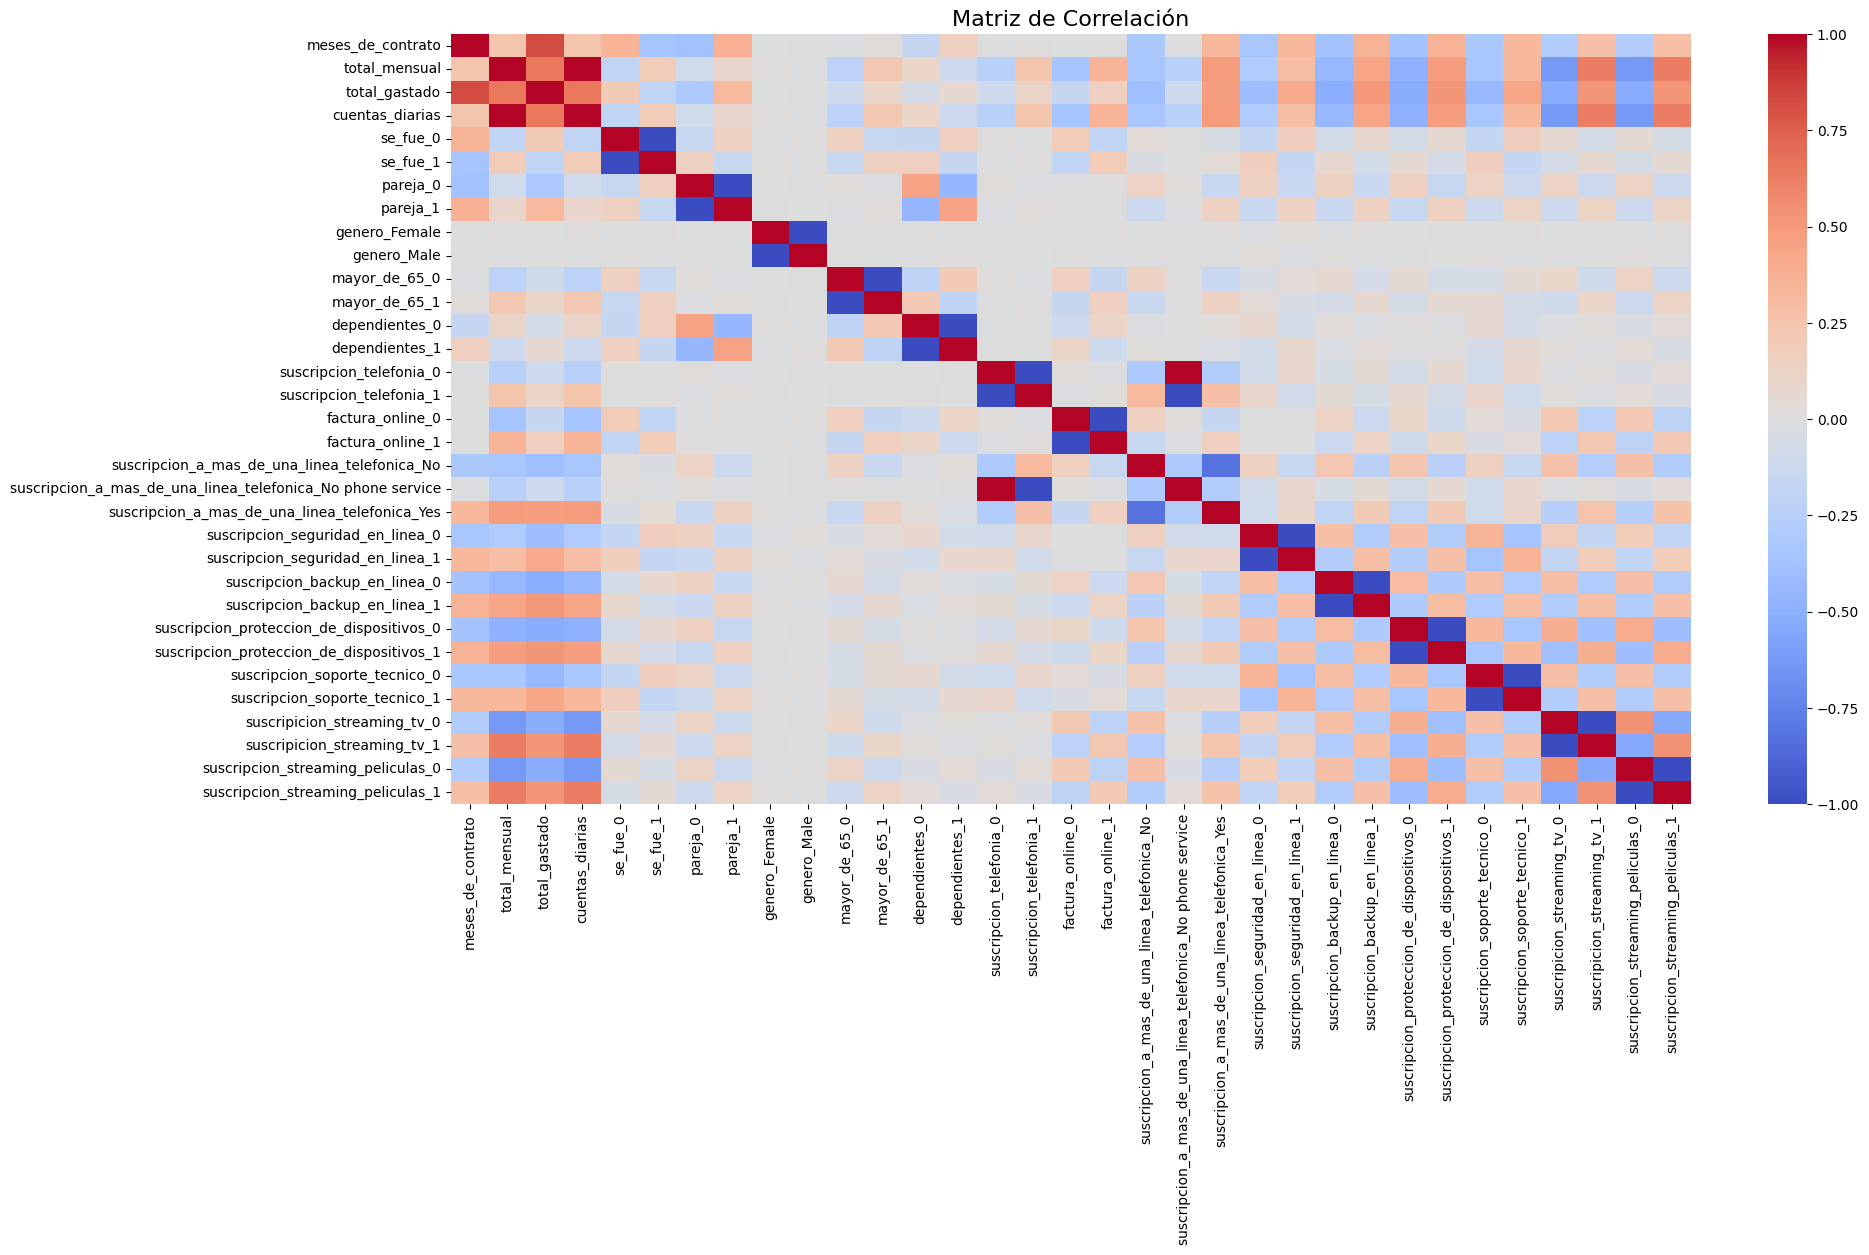

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ver correlaciones con churn (se_fue)
corr_churn = corr_matrix['se_fue_1'].sort_values(ascending=False)
print(corr_churn)

# Grafico Mapa de Calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

plt.savefig('matriz_correlacion.png')

#📄Informe final

## Conclusiones de los hallazgos:

Los clientes con contrato mensual, fibra óptica y pagos más frecuentes tienen una mayor probabilidad de cancelar el servicio.

Los clientes con contrato anual o bianual, pagos automáticos y mayor antigüedad tienden a permanecer más tiempo.

El método de pago y el tipo de contrato son factores especialmente influyentes, por que los clientes que usan el pago con cheque electrónico tienen mayor tasa de cancelación.

El coste diario y el pago mensual están positivamente correlacionados con la cancelación, lo que sugiere que los clientes con tarifas más altas o percepciones de coste elevado son más propensos a abandonar el servicio.

El uso de internet por fibra óptica muestra una mayor asociación con la cancelación, mientras que los clientes con servicio DSL tienden a permanecer más tiempo.

Estar adherido a recibir la factura electronica, son mas propensos a abandonar.

Los clientes que no tienen pareja, no tienen dependiente, son mas propensos a abandonar, que los clientes que estan en pareja y tienen dependiente.

## Recomendaciones:

En los contratos mensuales, promover incentivos , como descuentos para nuevos usuarios, descuentos por referidos o mejora del paquete básico. Implementar programa de fidelización con descuentos y ofertas a largo plazo  (semestral, anual, bianual) con niveles.

Crear un plan de entrada competitivo respecto al mercado.

Revisar y mejorar el servicio de fibra óptica. Realizar un análisis detallado con los clientes para identificar las causas del descontento (velocidad, estabilidad, soporte). Mejorar las tecnologias para asegurar una buena experiencia de usuario.

Atención personalizada a grupos vulnerables Identificar y atender especialmente a los clientes solteros y sin dependientes, asi como a adultos mayores que muestran mayor riesgo de abandono.

Fidelizar clientes nuevos, Ofrecer incentivos para contratos a largo plazo, como descuentos o beneficios exclusivos, para reducir la tasa de evasión en clientes con contratos mensuales.

Mejorar la experiencia del cliente en los primeros meses mediante atención proactiva y servicios personalizados.

Promover servicios adicionales que aumenten la vinculación del cliente con la marca.

Revisar la estrategia de precios y percepción de valor, especialmente en segmentos con alto gasto pero alta tasa de evasión.

Investigar la experiencia digital de los usuarios que reciben factura electrónica para detectar fricciones.

Fomentar y facilitar la automatización de los pagos digitales para evitar la necesidad de pagos manuales. Promover métodos de pago automáticos que reduzcan el riesgo de impagos o abandono por olvidos.
